In [30]:
from numpy import *
#from matplotlib import pyplot as plt
%matplotlib inline

In [31]:
a=array([[1,2,3,4],[1,2,3,4],[1,2,3,4]]) #2-d array
a

array([[1, 2, 3, 4],
       [1, 2, 3, 4],
       [1, 2, 3, 4]])

## resize

In [32]:
from PIL import Image
size = 259,259
im = Image.open('/home/naveen/Desktop/python programming/Lenna.png')
im_resized = im.resize(size, Image.ANTIALIAS)
im_resized.save("Lenna1", "PNG")


In [33]:
from skimage import io
rgb_image = io.imread('/home/naveen/Desktop/python programming/Lenna1')
k1,l1,m1=rgb_image.shape

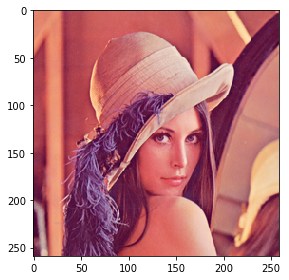

In [34]:
io.imshow(rgb_image)

In [35]:
rbg_image=float32(rgb_image)
green = rgb_image[:,:,1]
red= rgb_image[:,:,0]
blue= rgb_image[:,:,2]

In [36]:
red[0:2,0:2]

array([[226, 223],
       [226, 223]], dtype=uint8)

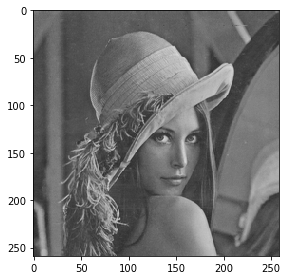

In [37]:
io.imshow(blue)


In [38]:
m,n=red.shape
m

259

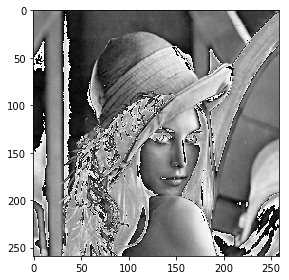

In [39]:
io.imshow(red+blue+green/3)

In [40]:
a=input("enter the filter size ")

enter the filter size 3


In [41]:
a1=ones((a,a,3))      #edge dection filter
for i in range(a):
    a1[i,1,1]=-8
a1                         

array([[[ 1.,  1.,  1.],
        [ 1., -8.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1., -8.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1., -8.,  1.],
        [ 1.,  1.,  1.]]])

In [42]:
a2=ones((a,a,3)) #blur filter 
a2                 

array([[[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]],

       [[ 1.,  1.,  1.],
        [ 1.,  1.,  1.],
        [ 1.,  1.,  1.]]])

In [43]:
a3=zeros((a,a,3))  #identity filter 
for i in range(a):
    a3[i,1,1]=1 
a3

array([[[ 0.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  0.]],

       [[ 0.,  0.,  0.],
        [ 0.,  1.,  0.],
        [ 0.,  0.,  0.]]])

## converting filter into single vector

In [44]:
a11=a1.reshape(a*a*3)
a21=a2.reshape(a*a*3)
a31=a3.reshape(a*a*3)
a11.shape

(27,)

In [45]:
s=input("Enter the stride size :(ex:1,2,3,4)")
    

Enter the stride size :(ex:1,2,3,4)2


In [46]:
newfilter=r_[[a11],[a21],[a31]]#filter matrix
d=((m-a)/s)+1
#if s==1:
    #m=(s)+d
K=zeros((3*a*a,(d*d))) #(filtersize,o/p_size)
y=0
K.shape

(27, 16641)

In [47]:
d

129

In [48]:
#r=red.reshape(m*n);
#g=green.reshape(m*n);
#b=blue.reshape(m*n);
#for i in range(d*d):
    #r1=r[i:i+(a*a)]
    #g1=g[i:i+(a*a)]
    #b1=b[i:i+(a*a)]
    #M=c_[[r1],[g1],[b1]]
    ##M1=transpose(M)
    #K[:,y]=M
    #y=y+1


In [49]:
for i in range(0,m-a+1,s):
    for j in range(0,m-a+1,s):
        r1=red[i:i+a,j:j+a].reshape((a*a))
        g1=green[i:i+a,j:j+a].reshape((a*a))
        b1=blue[i:i+a,j:j+a].reshape((a*a))
        M=c_[[r1],[g1],[b1]]
        ##M1=transpose(M)
        K[:,y]=M
        y=y+1

In [50]:
M.shape

(1, 27)

In [51]:
K.shape

(27, 16641)

In [52]:
newfilter.shape 

(3, 27)

In [53]:
f=newfilter.dot(K)
f.shape

(3, 16641)

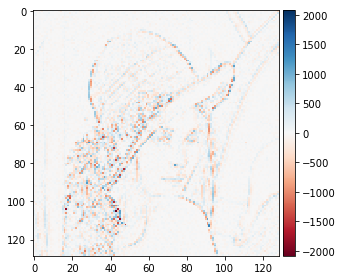

In [54]:
io.imshow(f[0,:].reshape((d,d)))

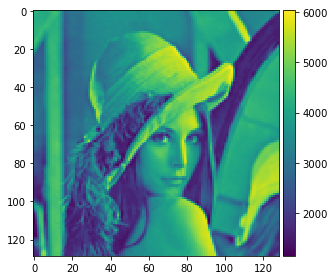

In [55]:
io.imshow(f[1,:].reshape((d,d)))

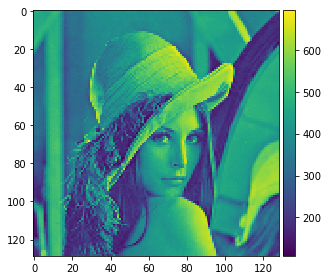

In [56]:
io.imshow(f[2,:].reshape((d,d)))

In [57]:
K

array([[ 226.,  226.,  226., ...,  101.,  111.,  142.],
       [ 223.,  228.,  226., ...,  102.,  123.,  159.],
       [ 226.,  226.,  224., ...,  111.,  142.,  162.],
       ..., 
       [ 124.,  118.,  118., ...,   62.,   82.,   84.],
       [ 123.,  119.,  117., ...,   77.,   84.,   79.],
       [ 118.,  118.,  112., ...,   82.,   84.,   81.]])

In [58]:
254/4

63